In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Read the CSV file into a pandas DataFrame
df1 = pd.read_csv('DATASET SKRIPSI/hasil_stemming_preprocessing_anis.csv')
df2 = pd.read_csv('DATASET SKRIPSI/hasil_stemming_preprocessing_prabowo.csv')
df3 = pd.read_csv('DATASET SKRIPSI/hasil_stemming_preprocessing_ganjar.csv')

data = [df1, df2, df3]
data = pd.concat(data, ignore_index=True)
data

# Display the DataFrame
data = data[['full_text','sentimen']]
data

,full_text,sentimen
0,ambil bansosnya pilih tetap no1,positif
1,padahal bilang bakal jadi sangka eeaaaa bener ...,negatif
2,aamiin alhamdulillah smg hasil sama hasily nnt...,positif
3,ratus personel gabung siap aman kampanye pamek...,positif
4,asal jangan,negatif
...,...,...
3280,fakta cupu sok suhu,negatif
3281,tersa kaya nurut sama emak,negatif
3282,memang klo pengkianat sekali laku selamax tets...,negatif
3283,jelas jangan bodoh rakyat amat lugu fokus aje ...,negatif


In [4]:
# melihat dan Hapus data yang kosong
data.isnull().sum()

full_text    4
sentimen     0
dtype: int64

In [5]:
data = data.dropna()
data.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [6]:
# melihat data yang duplicate dan menghapusnya
data.duplicated().sum()

47

In [7]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [8]:
data.shape

(3234, 2)

<function matplotlib.pyplot.show(close=None, block=None)>

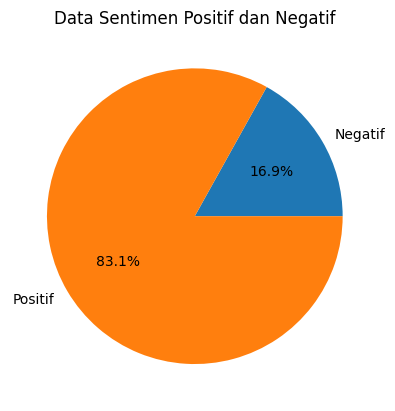

In [9]:
sentimenno = [np.count_nonzero(data['sentimen'] == 'negatif'), np.count_nonzero(data['sentimen'] == 'positif')]
label = ['Negatif','Positif']
plt.title('Data Sentimen Positif dan Negatif')
plt.pie(sentimenno, labels=label,radius=1, startangle=0, autopct='%.1f%%', shadow=False)
plt.show

In [10]:
# Melihat jumlah data positif
data[data['sentimen'] == 'positif'].count()

full_text    2687
sentimen     2687
dtype: int64

In [11]:
# Melihat jumlah data negatif
data[data['sentimen'] == 'negatif'].count()

full_text    547
sentimen     547
dtype: int64

In [12]:
data.to_csv("dataset_capres_cawapres.csv", index=False)

In [13]:
data = pd.read_csv("dataset_capres_cawapres2.csv")
data

FileNotFoundError: [Errno 2] No such file or directory: 'dataset_capres_cawapres2.csv'

In [14]:
# melihat data yang kosong
data.isnull().sum()

full_text    0
sentimen     0
dtype: int64

In [15]:
# melihat data yang duplicate
data.duplicated().sum()

0

In [16]:
data = data.replace({'positif':1, 'negatif':0})
x = data['full_text']
y = data['sentimen']

In [17]:
# ekstaksi fitur tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
x_tfidf = tfidf_vectorizer.fit_transform(x)

# membagi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

In [39]:
##### KNN Model ###
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=8)
knn_model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [40]:
y_pred_knn = knn_model.predict(X_test)

In [41]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred_knn)
report = classification_report(y_test, y_pred_knn, target_names=['negatif','positif'])

print("Accuracy", accuracy)
print("Clasification Report:\n", report)

Accuracy 0.8686244204018547
Clasification Report:
               precision    recall  f1-score   support

     negatif       0.61      0.32      0.42        96
     positif       0.89      0.96      0.93       551

    accuracy                           0.87       647
   macro avg       0.75      0.64      0.67       647
weighted avg       0.85      0.87      0.85       647



In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred_knn)

array([[ 31,  65],
       [ 20, 531]], dtype=int64)

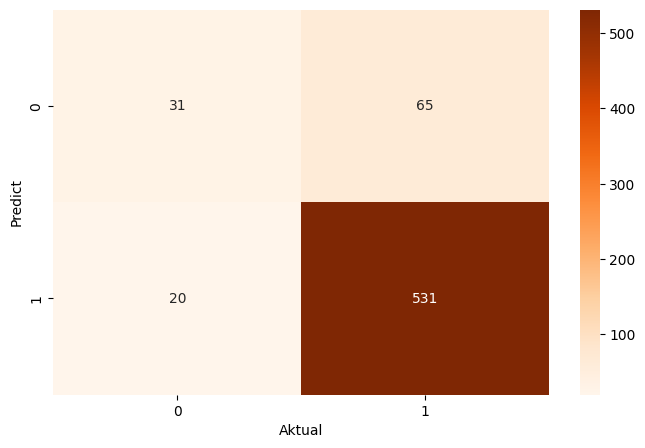

In [35]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, fmt='.0f', ax=ax, cmap='Oranges')
plt.xlabel('Aktual')
plt.ylabel('Predict')
plt.show()

In [36]:
from sklearn.model_selection import cross_val_score

# Menentukan model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Melakukan 10-fold cross-validation
cv_scores = cross_val_score(knn_model, x_tfidf, y, cv=10)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.80864198 0.83641975 0.79012346 0.80246914 0.84520124 0.78328173
 0.81424149 0.87616099 0.86687307 0.88854489]
Mean CV Accuracy: 0.8311957726560409


In [37]:
from sklearn.model_selection import cross_val_score

# Menentukan model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Melakukan 10-fold cross-validation
cv_scores = cross_val_score(knn_model, x_tfidf, y, cv=10)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.81790123 0.86419753 0.78703704 0.82407407 0.85139319 0.79876161
 0.82662539 0.87306502 0.85758514 0.87616099]
Mean CV Accuracy: 0.8376801207812561


In [25]:
from sklearn.model_selection import cross_val_score

# Menentukan model KNN
knn_model = KNeighborsClassifier(n_neighbors=7)

# Melakukan 10-fold cross-validation
cv_scores = cross_val_score(knn_model, x_tfidf, y, cv=10)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.82407407 0.85493827 0.80864198 0.82098765 0.84520124 0.82043344
 0.82043344 0.87616099 0.85758514 0.86687307]
Mean CV Accuracy: 0.839532928181019


In [37]:
from sklearn.model_selection import cross_val_score

# Menentukan model KNN
knn_model = KNeighborsClassifier(n_neighbors=8)

# Melakukan 10-fold cross-validation
cv_scores = cross_val_score(knn_model, x_tfidf, y, cv=10)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.82098765 0.86728395 0.81790123 0.81481481 0.85139319 0.82043344
 0.82662539 0.87925697 0.86377709 0.88544892]
Mean CV Accuracy: 0.8447922638841112


In [36]:
from sklearn.model_selection import cross_val_score

# Menentukan model KNN
knn_model = KNeighborsClassifier(n_neighbors=9)

# Melakukan 10-fold cross-validation
cv_scores = cross_val_score(knn_model, x_tfidf, y, cv=10)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.82716049 0.84567901 0.81790123 0.82716049 0.82662539 0.82972136
 0.82972136 0.86687307 0.86377709 0.86687307]
Mean CV Accuracy: 0.840149256583725


In [32]:
from sklearn.model_selection import cross_val_score

# Menentukan model KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Melakukan 10-fold cross-validation
cv_scores = cross_val_score(knn_model, x_tfidf, y, cv=5)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.82071097 0.7820711  0.80680062 0.84698609 0.86996904]
Mean CV Accuracy: 0.8253075638455171


In [44]:
from sklearn.model_selection import GridSearchCV

# Menentukan model KNN
knn_model = KNeighborsClassifier()

# Menentukan parameter grid yang akan diuji
param_grid = {'n_neighbors': [3, 5, 7, 8, 9, 10], 'weights': ['uniform', 'distance']}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(knn_model, param_grid, cv=10, scoring='accuracy')

# Melatih model menggunakan GridSearchCV
grid_search.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters:", grid_search.best_params_)

# Mengevaluasi model terbaik pada data uji
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Model Accuracy:", accuracy)


Best Parameters: {'n_neighbors': 8, 'weights': 'uniform'}
Best Model Accuracy: 0.8717156105100463


In [46]:
# Menampilkan hasil pencarian grid
grid_results = pd.DataFrame(grid_search.cv_results_)
print(grid_results[['params', 'mean_test_score']])

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters:", grid_search.best_params_)


                                        params  mean_test_score
0     {'n_neighbors': 3, 'weights': 'uniform'}         0.849253
1    {'n_neighbors': 3, 'weights': 'distance'}         0.846552
2     {'n_neighbors': 5, 'weights': 'uniform'}         0.846163
3    {'n_neighbors': 5, 'weights': 'distance'}         0.842302
4     {'n_neighbors': 7, 'weights': 'uniform'}         0.848469
5    {'n_neighbors': 7, 'weights': 'distance'}         0.844220
6     {'n_neighbors': 8, 'weights': 'uniform'}         0.853880
7    {'n_neighbors': 8, 'weights': 'distance'}         0.847318
8     {'n_neighbors': 9, 'weights': 'uniform'}         0.845768
9    {'n_neighbors': 9, 'weights': 'distance'}         0.841905
10   {'n_neighbors': 10, 'weights': 'uniform'}         0.848861
11  {'n_neighbors': 10, 'weights': 'distance'}         0.845000
Best Parameters: {'n_neighbors': 8, 'weights': 'uniform'}


In [47]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000101,0.000304,0.024147,0.007382,3,uniform,"{'n_neighbors': 3, 'weights': 'uniform'}",0.830116,0.857143,0.845560,0.857143,0.837838,0.845560,0.853282,0.848837,0.868217,0.848837,0.849253,0.010122,2
1,0.000000,0.000000,0.015630,0.000003,3,distance,"{'n_neighbors': 3, 'weights': 'distance'}",0.818533,0.853282,0.849421,0.857143,0.830116,0.833977,0.853282,0.848837,0.872093,0.848837,0.846552,0.014447,6
2,0.000000,0.000000,0.029696,0.004689,5,uniform,"{'n_neighbors': 5, 'weights': 'uniform'}",0.822394,0.849421,0.837838,0.857143,0.837838,0.849421,0.845560,0.848837,0.856589,0.856589,0.846163,0.010346,7
3,0.000000,0.000000,0.018756,0.006252,5,distance,"{'n_neighbors': 5, 'weights': 'distance'}",0.810811,0.845560,0.837838,0.857143,0.826255,0.837838,0.845560,0.848837,0.856589,0.856589,0.842302,0.014077,11
4,0.000000,0.000000,0.028133,0.009373,7,uniform,"{'n_neighbors': 7, 'weights': 'uniform'}",0.826255,0.845560,0.864865,0.857143,0.853282,0.853282,0.849421,0.848837,0.848837,0.837209,0.848469,0.010101,4
5,0.000000,0.000000,0.020319,0.007162,7,distance,"{'n_neighbors': 7, 'weights': 'distance'}",0.814672,0.841699,0.864865,0.857143,0.841699,0.841699,0.849421,0.848837,0.844961,0.837209,0.844220,0.012583,10
6,0.001563,0.004690,0.023445,0.007814,8,uniform,"{'n_neighbors': 8, 'weights': 'uniform'}",0.830116,0.853282,0.864865,0.868726,0.864865,0.861004,0.845560,0.848837,0.841085,0.860465,0.853880,0.011744,1
7,0.003126,0.006252,0.015630,0.000003,8,distance,"{'n_neighbors': 8, 'weights': 'distance'}",0.822394,0.841699,0.861004,0.872587,0.841699,0.833977,0.845560,0.848837,0.848837,0.856589,0.847318,0.013349,5
8,0.000000,0.000000,0.026609,0.006485,9,uniform,"{'n_neighbors': 9, 'weights': 'uniform'}",0.826255,0.845560,0.845560,0.857143,0.837838,0.853282,0.853282,0.844961,0.852713,0.841085,0.845768,0.008700,8
9,0.003125,0.006250,0.017193,0.004690,9,distance,"{'n_neighbors': 9, 'weights': 'distance'}",0.814672,0.841699,0.845560,0.857143,0.830116,0.841699,0.853282,0.844961,0.848837,0.841085,0.841905,0.011462,12


In [51]:
# import librray AdaBoost
from sklearn.ensemble import AdaBoostClassifier
# model AdaBoost
adabost_model = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)

# Latih Model
adabost_model.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=42)

In [52]:
y_pred_adaboost = adabost_model.predict(X_test)

In [53]:
# Evaluasi Model AdaBoost
accuracy = accuracy_score(y_test, y_pred_adaboost)
report = classification_report(y_test, y_pred_adaboost, target_names=['negatif','positif'])

print("Accuracy", accuracy)
print("Clasification Report:\n", report)

Accuracy 0.8763523956723338
Clasification Report:
               precision    recall  f1-score   support

     negatif       0.66      0.34      0.45        96
     positif       0.89      0.97      0.93       551

    accuracy                           0.88       647
   macro avg       0.78      0.66      0.69       647
weighted avg       0.86      0.88      0.86       647



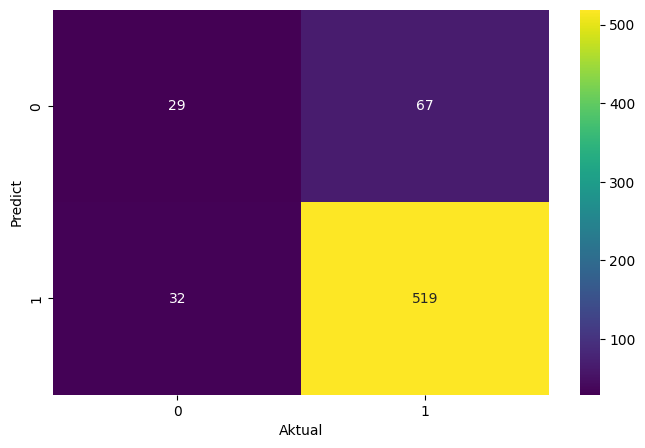

In [26]:
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_adaboost), annot=True, fmt='.0f', ax=ax, cmap='viridis')
plt.xlabel('Aktual')
plt.ylabel('Predict')
plt.show()

In [48]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import cross_val_score

# Menentukan model Adaboost
adaboost_model = AdaBoostClassifier(n_estimators=50)

# Melakukan 10-fold cross-validation
cv_scores_adaboost = cross_val_score(adaboost_model, x_tfidf, y, cv=10)

# Menampilkan hasil cross-validation
print("Cross-Validation Scores for Adaboost:", cv_scores_adaboost)
print("Mean CV Accuracy for Adaboost:", cv_scores_adaboost.mean())


Cross-Validation Scores for Adaboost: [0.8117284  0.8117284  0.83333333 0.83333333 0.82662539 0.75541796
 0.78637771 0.87925697 0.86377709 0.86687307]
Mean CV Accuracy for Adaboost: 0.8268451630164737


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier

# Menentukan model Adaboost
adaboost_model = AdaBoostClassifier()

# Menentukan parameter grid yang akan diuji
param_grid_adaboost = {'n_estimators': [10, 30, 50],
                       'learning_rate': [0.1, 0.5, 1.0]}

# Membuat objek GridSearchCV
grid_search_adaboost = GridSearchCV(adaboost_model, param_grid_adaboost, cv=10, scoring='accuracy')

# Melatih model menggunakan GridSearchCV
grid_search_adaboost.fit(X_train, y_train)

# Menampilkan parameter terbaik yang ditemukan
print("Best Parameters for Adaboost:", grid_search_adaboost.best_params_)

# Mengevaluasi model terbaik pada data uji
best_model_adaboost = grid_search_adaboost.best_estimator_
y_pred_adaboost = best_model_adaboost.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("Best Model Accuracy for Adaboost:", accuracy_adaboost)


Best Parameters for Adaboost: {'learning_rate': 0.5, 'n_estimators': 50}
Best Model Accuracy for Adaboost: 0.8624420401854714


In [27]:
# Menampilkan hasil pencarian grid untuk Adaboost
grid_results_adaboost = pd.DataFrame(grid_search_adaboost.cv_results_)
print(grid_results_adaboost[['params', 'mean_test_score']])


                                       params  mean_test_score
0  {'learning_rate': 0.1, 'n_estimators': 10}         0.826442
1  {'learning_rate': 0.1, 'n_estimators': 30}         0.826056
2  {'learning_rate': 0.1, 'n_estimators': 50}         0.826057
3  {'learning_rate': 0.5, 'n_estimators': 10}         0.826443
4  {'learning_rate': 0.5, 'n_estimators': 30}         0.835334
5  {'learning_rate': 0.5, 'n_estimators': 50}         0.835720
6  {'learning_rate': 1.0, 'n_estimators': 10}         0.827991
7  {'learning_rate': 1.0, 'n_estimators': 30}         0.834957
8  {'learning_rate': 1.0, 'n_estimators': 50}         0.834179


In [28]:
pd.DataFrame(grid_results_adaboost)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.253608,0.018541,0.004689,0.007162,0.1,10,"{'learning_rate': 0.1, 'n_estimators': 10}",0.826255,0.826255,0.826255,0.826255,0.826255,0.826255,0.822394,0.833333,0.825581,0.825581,0.826442,0.002561,7
1,0.768636,0.046453,0.007814,0.007814,0.1,30,"{'learning_rate': 0.1, 'n_estimators': 30}",0.826255,0.826255,0.822394,0.826255,0.826255,0.826255,0.822394,0.833333,0.825581,0.825581,0.826056,0.002836,9
2,1.329817,0.054963,0.014064,0.004688,0.1,50,"{'learning_rate': 0.1, 'n_estimators': 50}",0.826255,0.822394,0.822394,0.826255,0.826255,0.826255,0.822394,0.833333,0.829457,0.825581,0.826057,0.003243,8
3,0.276769,0.035822,0.006252,0.007657,0.5,10,"{'learning_rate': 0.5, 'n_estimators': 10}",0.826255,0.822394,0.818533,0.826255,0.826255,0.830116,0.826255,0.833333,0.825581,0.829457,0.826443,0.003872,6
4,0.810040,0.057971,0.012502,0.006251,0.5,30,"{'learning_rate': 0.5, 'n_estimators': 30}",0.830116,0.826255,0.830116,0.849421,0.837838,0.826255,0.837838,0.841085,0.833333,0.841085,0.835334,0.007074,2
5,1.352204,0.060539,0.014029,0.004677,0.5,50,"{'learning_rate': 0.5, 'n_estimators': 50}",0.833977,0.822394,0.818533,0.853282,0.841699,0.833977,0.837838,0.841085,0.837209,0.837209,0.835720,0.009279,1
6,0.288734,0.043729,0.001713,0.004661,1.0,10,"{'learning_rate': 1.0, 'n_estimators': 10}",0.818533,0.810811,0.818533,0.818533,0.833977,0.833977,0.849421,0.813953,0.833333,0.848837,0.827991,0.013246,5
7,0.827131,0.078725,0.006252,0.007657,1.0,30,"{'learning_rate': 1.0, 'n_estimators': 30}",0.830116,0.814672,0.810811,0.849421,0.833977,0.806950,0.864865,0.837209,0.837209,0.864341,0.834957,0.019444,3
8,1.542111,0.176365,0.015023,0.001367,1.0,50,"{'learning_rate': 1.0, 'n_estimators': 50}",0.841699,0.810811,0.814672,0.826255,0.841699,0.814672,0.868726,0.833333,0.829457,0.860465,0.834179,0.018413,4


# Visualisasi Data Klasifikasi KNN

### Visualisasi data Positif KNN

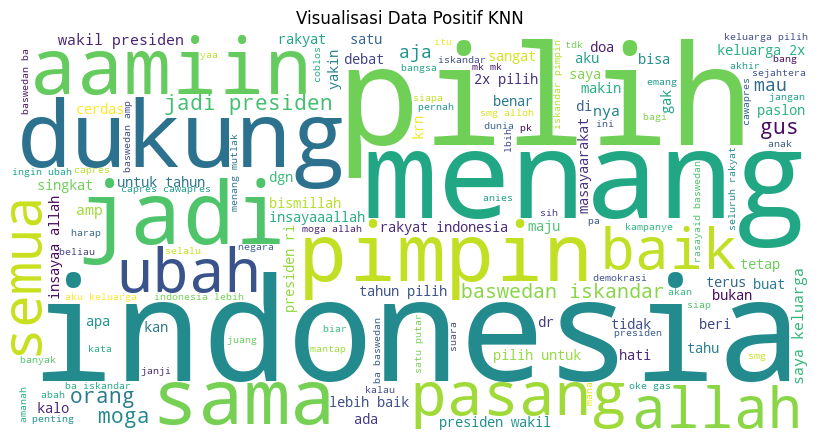

In [27]:
# Visualisasi data Negatif KNN

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mendapatkan indeks dari prediksi positif
positive_indices = [i for i, pred in enumerate(y_pred_knn) if pred == 1]

# Mengumpulkan teks yang terklasifikasi positif
positive_texts = [x.iloc[i] for i in positive_indices]

# Menggabungkan teks-teks tersebut menjadi satu teks
combined_text = ' '.join(positive_texts)

# Membuat WordCloud
wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(combined_text)

# Menampilkan WordCloud
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Visualisasi Data Positif KNN')

plt.show()


In [38]:
from collections import Counter
import matplotlib.pyplot as plt

# Mengumpulkan teks yang terklasifikasi positif dan negatif
positive_texts = data[y_pred_knn == 1]['full_text']
negative_texts = data[y_pred_knn == 0]['full_text']

# Menggabungkan teks-teks tersebut menjadi satu teks
combined_positive_text = ' '.join(positive_texts)
combined_negative_text = ' '.join(negative_texts)

# Menghitung frekuensi kemunculan setiap kata dalam teks terklasifikasi positif dan negatif
positive_word_counts = Counter(combined_positive_text.split())
negative_word_counts = Counter(combined_negative_text.split())

# Menghitung total kata dalam teks terklasifikasi positif dan negatif
total_positive_words = sum(positive_word_counts.values())
total_negative_words = sum(negative_word_counts.values())

# Menghitung persentase kemunculan setiap kata dalam teks terklasifikasi positif dan negatif
positive_word_percentages = {word: count / total_positive_words * 100 for word, count in positive_word_counts.items()}
negative_word_percentages = {word: count / total_negative_words * 100 for word, count in negative_word_counts.items()}

# Visualisasi
# Misalnya, Anda dapat membuat histogram untuk menunjukkan 10 kata paling umum
# dalam teks terklasifikasi positif dan negatif
plt.figure(figsize=(10, 5))

# Kata-kata paling umum dalam teks terklasifikasi positif
top_positive_words = dict(positive_word_counts.most_common(10))
plt.bar(top_positive_words.keys(), top_positive_words.values(), color='blue')
plt.title('Top 10 Most Common Words in Positive Texts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Kata-kata paling umum dalam teks terklasifikasi negatif
top_negative_words = dict(negative_word_counts.most_common(10))
plt.figure(figsize=(10, 5))
plt.bar(top_negative_words.keys(), top_negative_words.values(), color='red')
plt.title('Top 10 Most Common Words in Negative Texts')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


ValueError: Item wrong length 647 instead of 3234.

### Visualisasi Data Negatif Klasikasi KNN

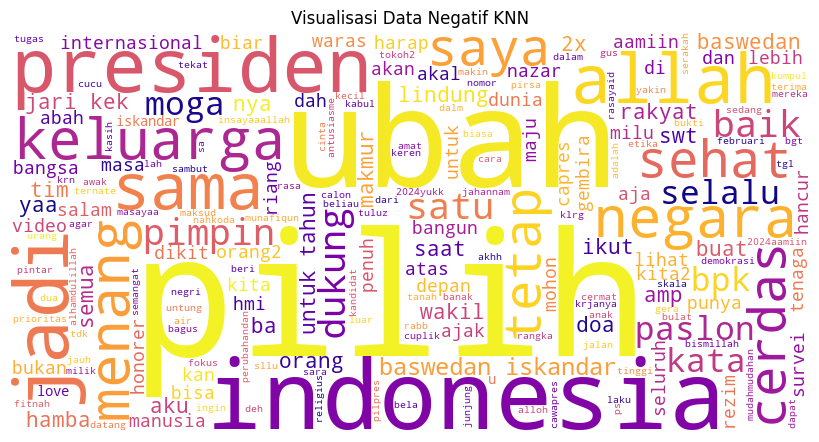

In [47]:
# Visualisasi Data Negatif Klasikasi KNN

# Mendapatkan indeks dari prediksi negatif
negative_indices = [i for i, pred in enumerate(y_pred_knn) if pred == 0]

# Mengumpulkan teks yang terklasifikasi negatif
negative_texts = [x.iloc[i] for i in negative_indices]

# Menggabungkan teks-teks tersebut menjadi satu teks
combined_text_neg = ' '.join(negative_texts)

# Membuat WordCloud
wordcloud_neg = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                colormap='plasma',
                stopwords = None, 
                min_font_size = 10).generate(combined_text_neg)

# Menampilkan WordCloud
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('Visualisasi Data Negatif KNN')

plt.show()


# Visualisasi wordcloud AdaBoost

### Visualisasi Data Positif Klasifikasi AdaBoost

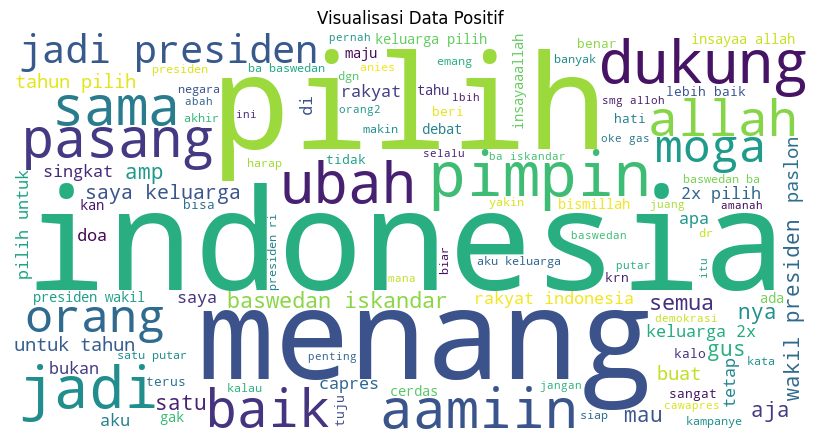

In [62]:
# Visualisasi Data Positif Klasifikasi AdaBoost

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Mendapatkan indeks dari prediksi positif
positive_indices = [i for i, pred in enumerate(y_pred_adaboost) if pred == 1]

# Mengumpulkan teks yang terklasifikasi positif
positive_texts = [x.iloc[i] for i in positive_indices]

# Menggabungkan teks-teks tersebut menjadi satu teks
combined_text = ' '.join(positive_texts)

# Membuat WordCloud
wordcloud = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                stopwords = None, 
                min_font_size = 10).generate(combined_text)

# Menampilkan WordCloud
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.title('Visualisasi Data Positif')

plt.show()

### Visualisasi Data Negatif Klasifikasi AdaBoost

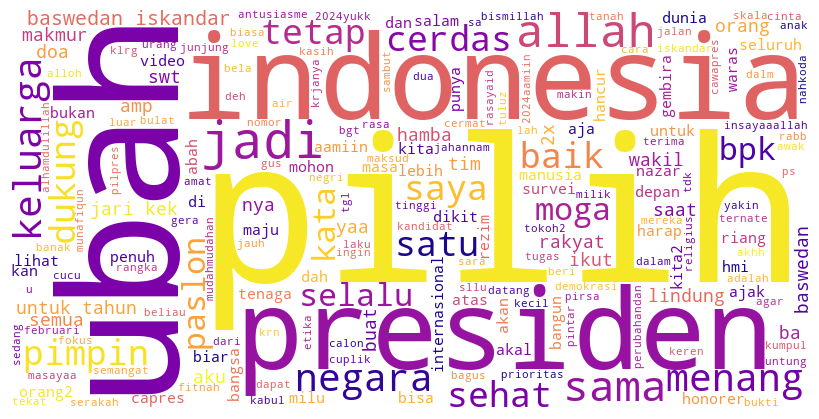

In [70]:
# Visualisasi Data Negatif Klasikasi AdaBoost

# Mendapatkan indeks dari prediksi negatif
negative_indices = [i for i, pred in enumerate(y_pred_knn) if pred == 0]

# Mengumpulkan teks yang terklasifikasi negatif
negative_texts = [x.iloc[i] for i in negative_indices]

# Menggabungkan teks-teks tersebut menjadi satu teks
combined_text_neg = ' '.join(negative_texts)

# Membuat WordCloud
wordcloud_neg = WordCloud(width = 800, height = 400, 
                background_color ='white', 
                colormap='plasma',
                stopwords = None, 
                min_font_size = 10).generate(combined_text_neg)

# Menampilkan WordCloud
plt.figure(figsize = (8, 4), facecolor = None) 
plt.imshow(wordcloud_neg) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()
